In [105]:
# Iris

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

In [106]:
data =pd.read_csv('Iris.csv')

In [107]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [109]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [110]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [111]:
data.duplicated().sum()

3

In [112]:
# dropping the dyplicates
data.drop_duplicates(inplace=True)
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [113]:
data.duplicated().sum()

0

In [114]:
x= data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y= data['species']

In [115]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [116]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
x_scaled= scaler.fit_transform(x)

In [117]:
pd.DataFrame(x_scaled).describe()

,0,1,2,3
count,147.000000,147.000000,147.000000,147.000000
mean,0.432351,0.439909,0.471233,0.462018
std,0.230306,0.182087,0.298154,0.315781
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.576271,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [118]:
#Cross Validation

from sklearn.model_selection import train_test_split

x_train, x_test, y_train,y_test= train_test_split(x_scaled,y,random_state= 0, test_size=0.25, stratify= y)

In [119]:
x_train.shape, y_train.shape

((110, 4), (110,))

In [120]:
y_train.value_counts()

species
Iris-versicolor    37
Iris-virginica     37
Iris-setosa        36
Name: count, dtype: int64

In [121]:
y_test.value_counts()

species
Iris-versicolor    13
Iris-virginica     12
Iris-setosa        12
Name: count, dtype: int64

In [122]:
y.value_counts()

species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

In [123]:
# build the model 

from sklearn.neighbors import KNeighborsClassifier

In [124]:
knn= KNeighborsClassifier(n_neighbors=14)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=14)

In [125]:
y_pred= knn.predict(x_test)

In [126]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

In [127]:
from sklearn.metrics import ConfusionMatrixDisplay

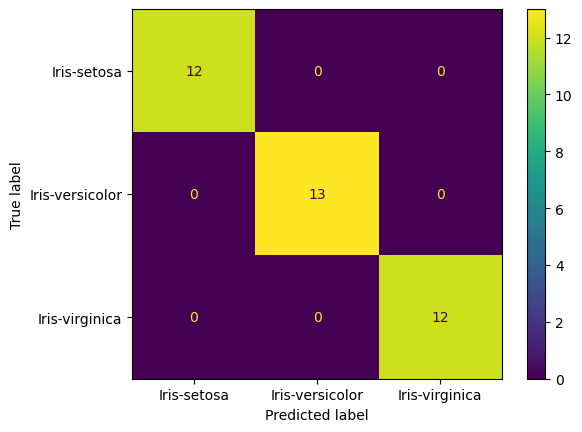

In [128]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [129]:
# Take user input for prediction
sepal_length = float(input("Enter Sepal Length: "))
sepal_width = float(input("Enter Sepal Width: "))
petal_length = float(input("Enter Petal Length: "))
petal_width = float(input("Enter Petal Width: "))

# Convert input to NumPy array and scale it
user_data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
user_data_scaled = scaler.transform(user_data)

# Predict the species
predicted_species = knn.predict(user_data_scaled)

# Display the predicted class
print(f"Predicted Species: {predicted_species[0]}")

Enter Sepal Length:  5
Enter Sepal Width:  3.4
Enter Petal Length:  1.5
Enter Petal Width:  0.2


Predicted Species: Iris-setosa


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
